<a href="https://colab.research.google.com/github/PrajwalPPatil/cognifyz_level2_RestuarantDatasetAnalysis/blob/main/Cognifyz_Level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Level2]Task1)Table Booking and Online Delivery

In [1]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

In [2]:
#Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#To ignore warning message to avoid cluttering the output
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Load Dataset
data=pd.read_csv("/content/Dataset .csv")
#Display  first five rows
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
#Show Summary of Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
missing_values=data.isnull().sum()
print('missing values in each column:')
print(missing_values)

missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [8]:
#Fill missing values in "Cuisine" column with mode
Mode_cuisines=data['Cuisines'].mode()[0]
data['Cuisines'].fillna(Mode_cuisines,inplace=True)
print(f'Missing values in "Cuisines" column after filling with mode: {data["Cuisines"].isnull().sum()}')

Missing values in "Cuisines" column after filling with mode: 0


# 1.Percentage of restuarant offering Table Booking & Online Delivery

Percentage of Restaurants offering Table Booking:
Has Table booking
No     87.875615
Yes    12.124385
Name: proportion, dtype: float64

Percentage of Restaurants offering Online Delivery:
Has Online delivery
No     74.337766
Yes    25.662234
Name: proportion, dtype: float64


(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

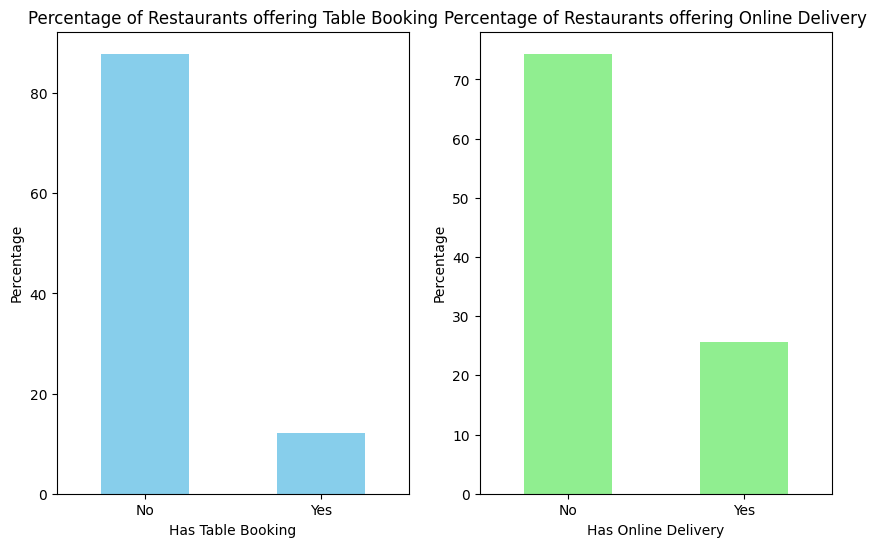

In [9]:
#Percentage of restaurants offering Table Booking and Online Delivery
#Calculate Percentage
table_booking_percentage=data['Has Table booking'].value_counts(normalize=True)*100
online_delivery_percentage=data['Has Online delivery'].value_counts(normalize=True)*100

#Display percentages
print("Percentage of Restaurants offering Table Booking:")
print(table_booking_percentage)
print("\nPercentage of Restaurants offering Online Delivery:")
print(online_delivery_percentage)

#Visualize percentages
plt.figure(figsize=(10,6))

#Table Booking
plt.subplot(1,2,1)
table_booking_percentage.plot(kind='bar',color='skyblue')
plt.title('Percentage of Restaurants offering Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

#Online Delivery
plt.subplot(1,2,2)
online_delivery_percentage.plot(kind='bar',color='lightgreen')
plt.title('Percentage of Restaurants offering Online Delivery')
plt.xlabel('Has Online Delivery')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

# 2. The avg ratings of restuarants with Table Booking and those without


Average Ratings for Restaurants with and without Table Booking:
Has Table booking
No     2.559359
Yes    3.441969
Name: Aggregate rating, dtype: float64


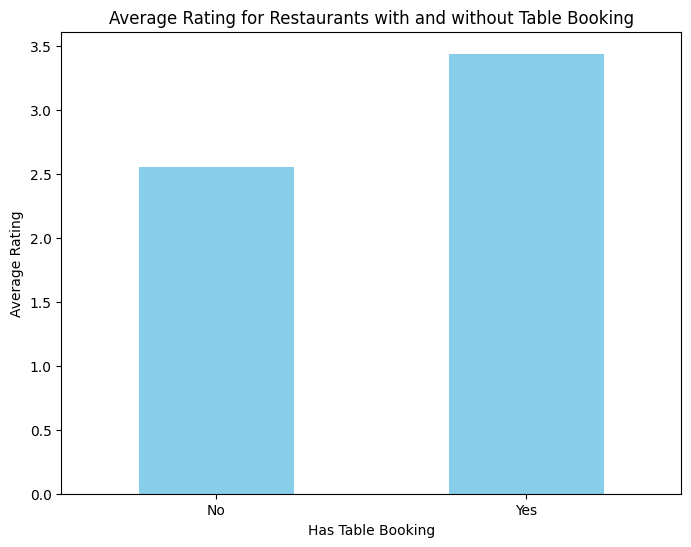

In [10]:
#Compare Ratings for Restaurants with and without Table Booking
#Group by Table Booking and Calculate Average rating
table_booking_ratings=data.groupby('Has Table booking')['Aggregate rating'].mean()

#Display results
print("\nAverage Ratings for Restaurants with and without Table Booking:")
print(table_booking_ratings)

#Visualize ratings
plt.figure(figsize=(8,6))
table_booking_ratings.plot(kind='bar',color='skyblue')
plt.title('Average Rating for Restaurants with and without Table Booking')
plt.xlabel('Has Table Booking')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

# 3.Analyze availability of Online Delivery among restuarants with diff Price ranges


Online Delivery Availability by Price Range(Counts):
Has Online delivery    No   Yes
Price range                    
1                    3743   701
2                    1827  1286
3                     997   411
4                     533    53

Online Delivery Availability by Price Range(Percentage):
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


<Figure size 800x500 with 0 Axes>

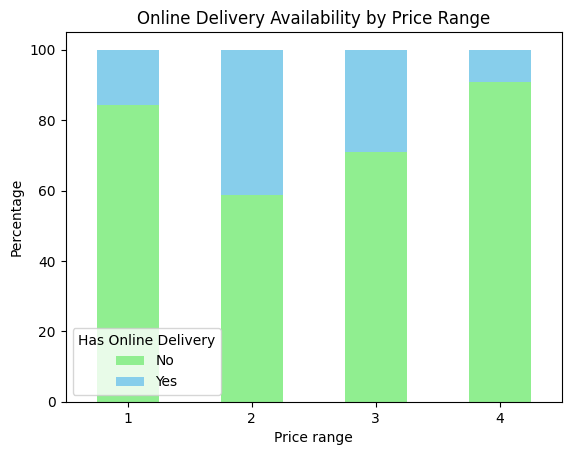

In [11]:
#Analyze Online Delivery Availability Across Price Ranges

#Group by Price range and Online Delivery
price_online_delivery=data.groupby(['Price range','Has Online delivery']).size().unstack(fill_value=0)

#Normalize by price range for percentage comparision
price_online_delivery_percentage=price_online_delivery.div(price_online_delivery.sum(axis=1),axis=0)*100

#Display results
print("\nOnline Delivery Availability by Price Range(Counts):")
print(price_online_delivery)
print("\nOnline Delivery Availability by Price Range(Percentage):")
print(price_online_delivery_percentage)

#Visualize Availability
plt.figure(figsize=(8,5))
price_online_delivery_percentage.plot(kind='bar',stacked=True,color=['lightgreen','skyblue'])
plt.title('Online Delivery Availability by Price Range')
plt.xlabel('Price range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Has Online Delivery')
plt.show()

# Level2]Task2)Price Range Analysis

# 1.The most common Price range among all restuarants

Most Common Price Range:
Price range
1    4444
2    3113
3    1408
4     586
Name: count, dtype: int64


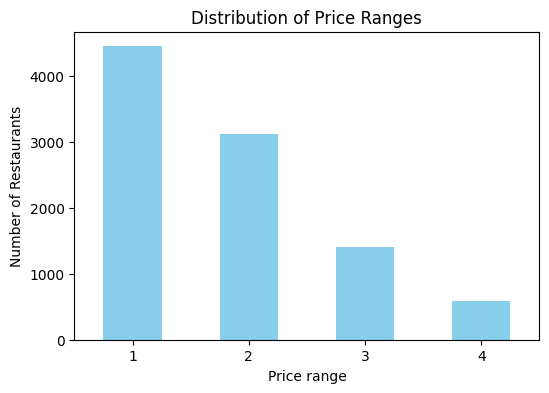


The most common price range is: 1


In [12]:
#Price range Analysis
#Determine the most common Price Range
#Count occurences of each price range
price_range_counts=data['Price range'].value_counts()

#Find the most common price range
most_common_price_range=price_range_counts.idxmax()

#Display the results
print("Most Common Price Range:")
print(price_range_counts)

#Visualize price range distribution
plt.figure(figsize=(6,4))
price_range_counts.plot(kind='bar',color='skyblue')
plt.title('Distribution of Price Ranges')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.show()

print(f"\nThe most common price range is: {most_common_price_range}")

# 2.The avg rating for each Price range


Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


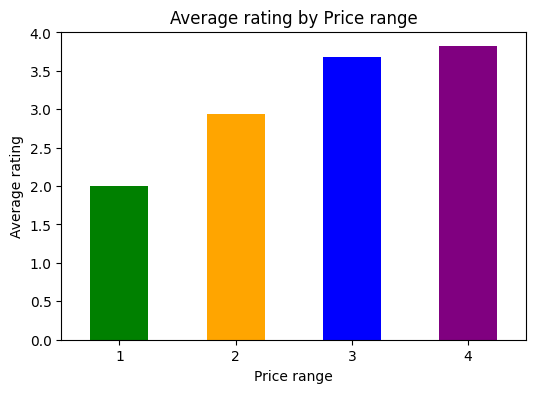

In [13]:
#Calculate Average Rating for Each Price Range
#Group by Price range and calculate the average rating
average_rating_per_price_range=data.groupby('Price range')['Aggregate rating'].mean()
#Display the results
print("\nAverage rating for each price range:")
print(average_rating_per_price_range)

#Visualize average ratings
plt.figure(figsize=(6,4))
average_rating_per_price_range.plot(kind='bar',color=['green','orange','blue','purple'])
plt.title('Average rating by Price range')
plt.xlabel('Price range')
plt.ylabel('Average rating')
plt.xticks(rotation=0)
plt.show()

# 3.The color represents the highest avg rating among diff Price ranges

The Price range with the highest average rating is: 4
The color representing this Price range is: purple


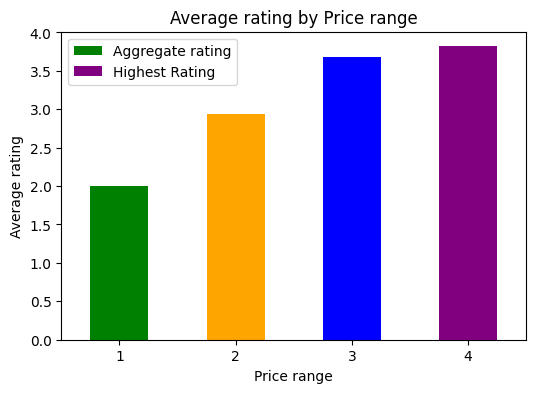

In [14]:
#define Price range colors
price_range_colors={
    1:'green',
    2:'orange',
    3:'blue',
    4:'purple'
}

#Calculate Average Ratings by Price Ranges
#Group by Price range and calculate the average rating
average_rating_per_price_range=data.groupby('Price range')['Aggregate rating'].mean()
#Identify the Price range with the highest average rating
highest_rating_price_range=average_rating_per_price_range.idxmax()

#Identify the color
#Find the color for the Price range with the highest average rating
highest_rating_color=price_range_colors[highest_rating_price_range]

#Display the results
print(f"The Price range with the highest average rating is: {highest_rating_price_range}")
print(f"The color representing this Price range is: {highest_rating_color}")

#Visualizing the Results
#Plot average ratings with assigned colors
plt.figure(figsize=(6,4))
average_rating_per_price_range.plot(kind='bar',color=[price_range_colors[pr] for pr in average_rating_per_price_range.index])
#Highlight the bar with the highest rating
plt.bar(highest_rating_price_range,average_rating_per_price_range[highest_rating_price_range],color='Purple',label='Highest Rating')
#Add labels and legend
plt.title('Average rating by Price range')
plt.xlabel('Price range')
plt.ylabel('Average rating')
plt.xticks(rotation=0)
plt.legend()
plt.show()

# Level2]Task3)Feature Engineering

# Extract additional Features

In [15]:
#Extract Additional Features
#1.Length of the Restaurant Name
data['NameLength']=data['Restaurant Name'].apply(len)

In [16]:
data['NameLength']

,NameLength
0,16
1,16
2,22
3,4
4,11
...,...
9546,11
9547,12
9548,5
9549,11


In [17]:
#2.Length of the Address
data['AddressLength']=data['Address'].apply(len)

In [18]:
data['AddressLength']

,AddressLength
0,71
1,67
2,56
3,70
4,64
...,...
9546,103
9547,77
9548,73
9549,75


In [19]:
#Create New features
#1.Has Table Booking:convert 'Table Booking' column (categorical) to a binary(1/0)
#Encode 'Table Booking' as binary
data['Has Table booking']=data['Has Table booking'].map({'Yes':1,'No':0})

In [20]:
data['Has Table booking']

,Has Table booking
0,1
1,1
2,1
3,0
4,1
...,...
9546,0
9547,0
9548,0
9549,0


In [21]:
#2.Has Online Delivery
#Encode 'Online Delivery' as binary
data['Has Online delivery']=data['Has Online delivery'].apply(lambda x: 1 if x=='Yes' else 0)

In [22]:
data['Has Online delivery']

,Has Online delivery
0,0
1,0
2,0
3,0
4,0
...,...
9546,0
9547,0
9548,0
9549,0


In [23]:
#3.Is High Rated
#Create a binary feature for high rated restaurants
data['Is High Rated']=data['Aggregate rating'].apply(lambda x: 1 if x >=4.0 else 0)

In [24]:
data['Is High Rated']

,Is High Rated
0,1
1,1
2,1
3,1
4,1
...,...
9546,1
9547,1
9548,0
9549,1


In [25]:
#Verify the New Features
print(data.head(20))

    Restaurant ID                           Restaurant Name  Country Code  \
0         6317637                          Le Petit Souffle           162   
1         6304287                          Izakaya Kikufuji           162   
2         6300002                    Heat - Edsa Shangri-La           162   
3         6318506                                      Ooma           162   
4         6314302                               Sambo Kojin           162   
5        18189371                              Din Tai Fung           162   
6         6300781                                Buffet 101           162   
7         6301290                                   Vikings           162   
8         6300010  Spiral - Sofitel Philippine Plaza Manila           162   
9         6314987                                  Locavore           162   
10        6309903                          Silantro Fil-Mex           162   
11        6309455           Mad Mark's Creamery & Good Eats           162   

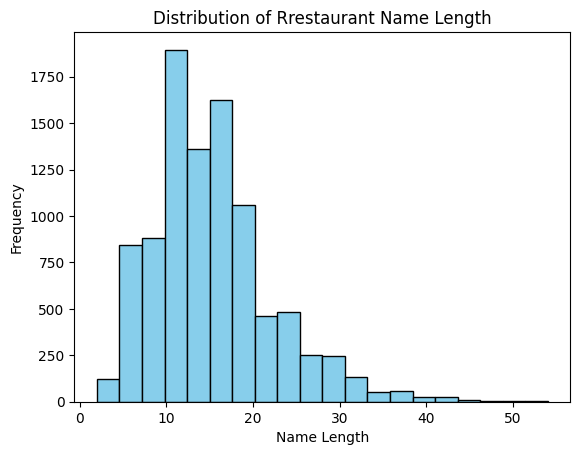

In [26]:
#Step 5:Analyze the New Features
#1.Distribution of Length Features
import matplotlib.pyplot as plt
#Histogram of name length
plt.hist(data['NameLength'],bins=20,color='skyblue',edgecolor='black')
plt.title('Distribution of Rrestaurant Name Length')
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.show()

<Figure size 800x600 with 0 Axes>

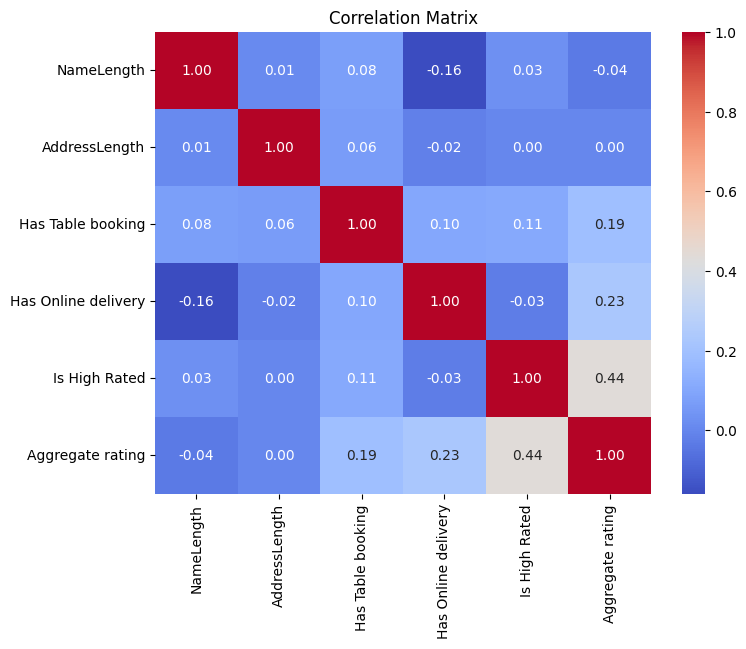

In [27]:
#2.Correlation with Ratings
#Correlation matrix to analyze new features
correlation_matrix=data[['NameLength','AddressLength','Has Table booking','Has Online delivery','Is High Rated','Aggregate rating']].corr()

#Visualize correlations
import seaborn as sns
plt.figure(figsize=(8,6))
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()